# Housing Price Predictor

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from FormatScripts import string

pd.options.display.max_columns = None
%matplotlib inline

## Functions used

In [429]:
def string(x):
    return str(x)

In [438]:
def add_unit(x):
    if x != 0:
        return ' ' + str(x)
    else:
        return ''

def lower(x):
    return x.lower()

def roound(x):
    if isinstance(x,str)==True:
        return x
    else:
        return round(x)

In [625]:
def abr_suf(x):
    if x == 'Street':
        return ' st'
    elif x == 'Avenue':
        return ' ave'
    elif x == 'Boulevard':
        return ' blvd'
    elif x == 'Drive':
        return ' dr'
    elif x == 'Way':
        return ' wy'
    elif x == 'Place' or x == 'place':
        return ' pl'
    elif x == 'Lane':
        return ' ln'
    elif x == 'Court':
        return ' ct'
    elif x == 'Parkway':
        return ' pkwy'
    elif x == 'Road':
        return ' rd'
    else:
        return ''

In [1229]:
def prop_type_update(x):
    if x == 'Loft' or x == 'Commercial/Residential' or x == 'Duplex':
        return 'Single Family Residence'
    else:
        return x
        

### Read-in CSV for Title Data

In [425]:
df_santa_monica = pd.read_csv('Santa Monica.csv')

df_venice = pd.read_csv('Venice.csv')

df_playavista = pd.read_csv('Playa Vista.csv')

df_mdr = pd.read_csv('Marina Del Rey.csv')

In [426]:
df = pd.concat([df_santa_monica,df_venice,df_playavista,df_mdr],ignore_index=True)

In [427]:
df.shape

(39652, 48)

In [428]:
df['Site Address Zip'].unique()

array([90402, 90403, 90401, 90405, 90404, 90292, 90291, 90094])

### clean data only pull house sales from the past 3 years

In [429]:
def string(x):
    return str(x)

In [430]:
df['Sale Date']= df['Sale Date'].apply(string)
df['Sale Year'] = df['Sale Date'].apply(lambda x: x[-4:])

In [431]:
# df = df[(df['Sale Year']=='2015') | (df['Sale Year']=='2016') | (df['Sale Year']=='2017') | 
#         (df['Sale Year']=='2018') | (df['Sale Year']=='2019')].reset_index()

In [432]:
df.shape

(39652, 49)

In [433]:
df.columns

Index(['Parcel Number', 'Owner1 First Name', 'Owner1 Last Name',
       'Owner2 First Name', 'Owner2 Last Name', 'Site Address House Number',
       'Site Address Street Name', 'Site Address Unit Number', 'Site Address',
       'Site Address City', 'Site Address State', 'Site Address Zip',
       'Mail Address House Number', 'Mail Address Street Name',
       'Mail Address Unit Number', 'Mail Address', 'Mail Address City',
       'Mail Address State', 'Mail Address Zip', 'Tract', 'Zoning',
       'Building Area', 'Year Built', 'Bedrooms', 'Bathrooms',
       'Use Code Description', 'Use Code', 'Cost Per Sq Ft', 'Sale Date',
       'Sales Price', 'Sales Document Number', 'Prior Sale Date',
       'Prior Sales Price', 'Deed Type', 'Lot Area SQFT', 'Number of Units',
       'Number of Stories', 'Tax Amount', 'Loan Amount', 'Lender Name',
       'Title Company Name', 'Total Assessed Value',
       'Assessed Improvement Value', 'Assessed Land Value',
       'Distressed Status', 'Owner Occup

In [434]:
# df['Parcel Number']

In [435]:
df = df[['Parcel Number', 'Site Address', 'Site Address Unit Number', 'Site Address City', 
        'Year Built', 'Bedrooms',
         'Bathrooms', 'Sale Date',
        'Sales Price', 'Prior Sale Date', 'Lot Area SQFT','Owner Occupied']]

In [436]:
df['Site Address'].dropna(inplace=True)

In [437]:
df['Site Address Unit Number'].fillna(0,inplace=True)

In [439]:
df['Site Address Unit Number'] = df['Site Address Unit Number'].apply(lambda x: roound(x))

In [440]:
df.head(3)

,Parcel Number,Site Address,Site Address Unit Number,Site Address City,Year Built,Bedrooms,Bathrooms,Sale Date,Sales Price,Prior Sale Date,Lot Area SQFT,Owner Occupied
0,2205-028-004,449 14Th St,0,Santa Monica,NaN,NaN,NaN,09/19/2008,NaN,01/21/1969,3091.0,Y
1,3009-009-003,1158 26Th St,210,Santa Monica,NaN,NaN,NaN,10/31/1997,12000.0,NaN,8524.0,Y
2,3027-010-033,837 18Th St,6,Santa Monica,NaN,NaN,NaN,05/12/2016,540003.0,05/02/2014,46304.0,Y


In [441]:
df['addy'] = df['Site Address'] + df['Site Address Unit Number'].apply(add_unit)

In [444]:
df.addy.dropna(inplace=True)

In [446]:
df.addy = df.addy.apply(lower)

In [447]:
df.addy.sample(10)

8475                    315 20th st
14714                  3014 17th st
16152                 659 marine st
38516           151 union jack mall
36835    13650 marina pointe dr 404
26912                214 rennie ave
12698                  1538 16th st
31155      6400 crescent park e 111
37155          4060 glencoe ave 309
5350                 1424 26th st 3
Name: addy, dtype: object

# MLS DATA

In [1330]:
full_list = []
for i in range(1,63):
    x = pd.read_csv('Full ({}).csv'.format(i))
    full_list.append(x)

In [1331]:
MLS = pd.concat(full_list,ignore_index=True)

In [1332]:
MLS.shape

(30197, 596)

In [1335]:
MLS = MLS[['ClosePrice','ParcelNumber','LotSizeAcres','PrivateRemarks',
           'PublicRemarks','Appliances',
                'AppliancesYN','MLSAreaMajor',
           'AssociationAmenities',
               'AssociationFee','BathroomsTotalInteger','BathroomsFull',
               'BedroomsTotal','City', 'CommonWalls','Cooling','CoolingYN',
               'CountyOrParish','CumulativeDaysOnMarket','CurrentPrice',
                'FireplaceYN','HeatingYN','Latitude','Longitude','LaundryYN','OriginalListPrice',
                'LotSizeSquareFeet','ParkingTotal', 'NumberOfUnitsTotal','OccupantType',
                'OnMarketTimestamp','OpenHouseCount','ParkingYN','PatioYN','PoolPrivateYN',
                'PricePerSquareFoot','PropertyType','PropertySubType','RoomType',
                'BuyerAgencyCompensation','UnitNumber','LivingArea','StateOrProvince',
                'StoriesTotal','StreetName','StreetNumberNumeric','StreetSuffix',
                'SyndicationRemarks','ViewYN','YearBuilt','PostalCode','Zoning',
               'StandardStatus','CloseDate']]


MLS.UnitNumber.fillna(0,inplace=True)

## Pull Recent Sale Data Only

In [1338]:
MLS['Close Month']=pd.to_datetime(MLS.CloseDate).dt.month
MLS['Close Year']=pd.to_datetime(MLS.CloseDate).dt.year

In [1339]:
MLS=MLS[MLS['Close Year']>2015]

In [1341]:
MLS['addy'] = MLS['StreetNumberNumeric'].apply(lambda x: str(x)) + ' ' + MLS.StreetName.apply(lower) + MLS.StreetSuffix.apply(abr_suf) + MLS.UnitNumber.apply(add_unit)

In [1342]:
MLS.addy.sample(10)

18011    4350 glencoe ave 2
166             727 navy st
14625        1824 20th st A
23321        338 vernon ave
23874      331 windward ave
53           508 pier ave 1
10419           450 17th st
18310        731 oxford ave
19311       6 voyage st 104
5403          923 20th st 5
Name: addy, dtype: object

In [1345]:
MLS.head()

,ClosePrice,ParcelNumber,LotSizeAcres,PrivateRemarks,PublicRemarks,Appliances,AppliancesYN,MLSAreaMajor,AssociationAmenities,AssociationFee,BathroomsTotalInteger,BathroomsFull,BedroomsTotal,City,CommonWalls,Cooling,CoolingYN,CountyOrParish,CumulativeDaysOnMarket,CurrentPrice,FireplaceYN,HeatingYN,Latitude,Longitude,LaundryYN,OriginalListPrice,LotSizeSquareFeet,ParkingTotal,NumberOfUnitsTotal,OccupantType,OnMarketTimestamp,OpenHouseCount,ParkingYN,PatioYN,PoolPrivateYN,PricePerSquareFoot,PropertyType,PropertySubType,RoomType,BuyerAgencyCompensation,UnitNumber,LivingArea,StateOrProvince,StoriesTotal,StreetName,StreetNumberNumeric,StreetSuffix,SyndicationRemarks,ViewYN,YearBuilt,PostalCode,Zoning,StandardStatus,CloseDate,Close Month,Close Year,addy
0,1205000.0,4.27001e+09,8.5329,Complex is self-managed and well maintained. T...,Here's your holiday homeÃ¢Â€Â¦ 3-bedroom townh...,"Disposal, Water Heater, Oven, Refrigerator, Di...",True,C14 - Santa Monica,"Pool, Spa/Hot Tub, Sauna, Tennis Court(s), Clu...",520.0,3.0,3.0,3.0,Santa Monica,End Unit,"Central Air, Gas, Electric",True,Los Angeles,16,1205000,True,True,34.019807,-118.458196,True,1020000.0,371692.0,2.0,75.0,NaN,12/15/2017 12:54:21 PM,4.0,True,True,NaN,792.76,Residential,Townhouse,"Master Bedroom, All Bedrooms Up, Living Room, ...",2.75,0,1520.0,CA,0.0,VILLAGE PARKWAY,47,NaN,Here's your holiday homeÃ¢Â€Â¦ 3-bedroom townh...,NaN,1974.0,90405,SMR1*,Closed,02/16/2018 12:00:00 AM,2.0,2018.0,47 village parkway
1,1890000.0,4.27001e+09,0.1794,Den was originally a third bedroom. Trustee sa...,Prime Pearl Street Sunset Park Home on Oversiz...,"Disposal, Gas Water Heater, Refrigerator",True,C14 - Santa Monica,NaN,NaN,1.0,1.0,2.0,Santa Monica,No Common Walls,None,False,Los Angeles,11,1890000,True,True,34.020163,-118.460235,True,1800000.0,7814.0,NaN,0.0,NaN,12/15/2017 12:13:41 PM,3.0,True,NaN,False,1494.07,Residential,Single Family Residence,Entry,2.50,0,1265.0,CA,1.0,PEARL,2530,Street,Go direct contact the Listing Agent Direct: Lo...,False,1941.0,90405,SMR1*,Closed,01/24/2018 12:00:00 AM,1.0,2018.0,2530 pearl st
2,720000.0,4.28701e+09,0.1643,Please contact LA1 for all showing requests an...,Feel the ocean breeze and watch the sunset ove...,Gas Oven,True,C14 - Santa Monica,Earthquake Insurance,298.0,1.0,1.0,1.0,Santa Monica,NaN,None,False,Los Angeles,70,720000,False,True,34.004771,-118.482761,True,775000.0,7159.0,1.0,10.0,NaN,12/13/2017 4:32:01 PM,9.0,True,NaN,False,1082.71,Residential,Condominium,"Master Bedroom, Living Room",2.50,2,665.0,CA,2.0,4TH,2444,Street,Feel the ocean breeze and watch the sunset ove...,True,1964.0,90405,SMOP2*,Closed,04/10/2018 12:00:00 AM,4.0,2018.0,2444 4th st 2
3,1550000.0,4.27301e+09,0.1547,"Property is being sold ""As-Is"", condition. No ...",First time on the market in over 50 years! Sin...,"Freezer, Refrigerator, Water Heater",True,C14 - Santa Monica,NaN,0.0,2.0,2.0,3.0,Santa Monica,No Common Walls,None,False,Los Angeles,11,1550000,True,True,34.019241,-118.464033,True,1695000.0,6740.0,2.0,1.0,Owner,12/11/2017 5:22:23 PM,0.0,True,True,False,1053.70,Residential,Single Family Residence,"All Bedrooms Down, Art Studio, Basement, Kitch...",2.00,0,1471.0,CA,1.0,Cloverfield,2308,Boulevard,First time on the market in over 50 years! Sin...,False,1936.0,90405,SMR1*,Closed,02/21/2018 12:00:00 AM,2.0,2018.0,2308 cloverfield blvd
4,525000.0,4.27001e+09,0.4101,No showings before first open house. Open hou...,This light and bright 1 bed/1bath condo in fab...,"Refrigerator, Dishwasher",True,C14 - Santa Monica,Other,224.0,1.0,1.0,1.0,Santa Monica,NaN,None,False,Los Angeles,9,525000,False,NaN,34.026334,-118.452100,True,499000.0,17862.0,NaN,12.0,NaN,12/07/2017 7:22:01 PM,3.0,True,True,False,837.32,Residential,Condominium,See Remarks,2.50,E,627.0,CA,2.0,CENTINELA,2427,Avenue,This light and bright 1 bed/1bath condo in fab...,True,1950.0,90405,SMR2*,Closed,01/11/2018 12:00:00 AM,1.0,2018.0,2427 centinela ave E


In [1427]:
MLS.shape

(4673, 57)

In [1429]:
MLS.LotSizeAcres.count()

4111

# Merge Datasets

In [1352]:
merge = MLS

In [1353]:
# merge = MLS.merge(df, on='addy', copy=False)

# merge.drop_duplicates(subset='addy', keep='first', inplace=True)

In [1354]:
merge.shape

(4673, 57)

In [1355]:
merge.columns

Index(['ClosePrice', 'ParcelNumber', 'LotSizeAcres', 'PrivateRemarks',
       'PublicRemarks', 'Appliances', 'AppliancesYN', 'MLSAreaMajor',
       'AssociationAmenities', 'AssociationFee', 'BathroomsTotalInteger',
       'BathroomsFull', 'BedroomsTotal', 'City', 'CommonWalls', 'Cooling',
       'CoolingYN', 'CountyOrParish', 'CumulativeDaysOnMarket', 'CurrentPrice',
       'FireplaceYN', 'HeatingYN', 'Latitude', 'Longitude', 'LaundryYN',
       'OriginalListPrice', 'LotSizeSquareFeet', 'ParkingTotal',
       'NumberOfUnitsTotal', 'OccupantType', 'OnMarketTimestamp',
       'OpenHouseCount', 'ParkingYN', 'PatioYN', 'PoolPrivateYN',
       'PricePerSquareFoot', 'PropertyType', 'PropertySubType', 'RoomType',
       'BuyerAgencyCompensation', 'UnitNumber', 'LivingArea',
       'StateOrProvince', 'StoriesTotal', 'StreetName', 'StreetNumberNumeric',
       'StreetSuffix', 'SyndicationRemarks', 'ViewYN', 'YearBuilt',
       'PostalCode', 'Zoning', 'StandardStatus', 'CloseDate', 'Close Month'

In [1356]:
merge.PostalCode.unique()

array([90405, 90401, 90403, 90402, 90404, 90292, 90291, 90094])

# Prepping Data For Modeling

In [1434]:
daddy = merge
master = daddy[['addy','City','PostalCode',
                'ClosePrice','CloseDate',
                'CurrentPrice', 
                'YearBuilt','LivingArea', 
                'BedroomsTotal','BathroomsTotalInteger',
                'LotSizeAcres','LotSizeSquareFeet',
                'Latitude','Longitude', 
                'StoriesTotal', 
                'CloseDate','Close Month','Close Year',
                'PropertyType',
                'PropertySubType','RoomType',

                'AppliancesYN','CoolingYN', 'FireplaceYN', 
                'HeatingYN','LaundryYN','ParkingYN',
                'PatioYN', 'PoolPrivateYN', 
                

                
                'CommonWalls',
]]

In [1435]:
# daddy = merge
# master = daddy[['addy','City','PostalCode', 'Owner Occupied',
#                  'Sales Price', 'Sale Date','CloseDate','Prior Sale Date',
#                  'CurrentPrice', 
#                  'YearBuilt',
#                  'Bedrooms','Bathrooms','BedroomsTotal','BathroomsTotalInteger',
#                  'Lot Area SQFT','LotSizeAcres','LotSizeSquareFeet',
#                  'AppliancesYN','CoolingYN', 'FireplaceYN', 
#                  'HeatingYN','LaundryYN','ParkingYN',
#                  'PatioYN', 'PoolPrivateYN', 'PropertyType',
#                  'CommonWalls',
#                  'Latitude','Longitude', 
#                  'PropertySubType','RoomType','LivingArea', 
#                  'StoriesTotal', 
#                  'Close Month','Close Year']]

In [1439]:
def yn_impute(x):
    if x == 'True':
        return 1
    else:
        return 0
    
def impute_features(df, feature_list):
    for feature in feature_list:
        df.feature = df.feature.apply(yn_impute)

In [ ]:
col_list = ['AppliancesYN','CoolingYN', 'FireplaceYN','HeatingYN',
            'LaundryYN','ParkingYN','PatioYN', 'PoolPrivateYN']



In [1438]:
# master[['AppliancesYN','CoolingYN', 'FireplaceYN','HeatingYN','LaundryYN','ParkingYN','PatioYN', 'PoolPrivateYN']]

# Get Dummies
+ Property Type

In [1367]:
master.PropertySubType = master.PropertySubType.apply(prop_type_update)
prop_type_df = pd.get_dummies(master.PropertySubType)
master = pd.concat([master,prop_type_df],axis=1)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [1370]:
master = master[['ClosePrice','YearBuilt', 
                 'BedroomsTotal','BathroomsTotalInteger', 
                 'Latitude','Longitude',
                 'LivingArea','StoriesTotal',
                 'LotSizeSquareFeet',
                 'Close Month','Close Year',
                 'Single Family Residence', 'Condominium', 'Townhouse']]

## Impute Missing Values

In [1403]:
master.StoriesTotal.fillna(1, inplace=True)

master.LivingArea.fillna(master.LivingArea.mean(), inplace=True)

master['LotSizeSquareFeet'].fillna(master['LotSizeSquareFeet'].mean(), inplace=True)

master.BathroomsTotalInteger.fillna(master.BathroomsTotalInteger.mean(), inplace=True)

master.BedroomsTotal.fillna(master.BedroomsTotal.mean(), inplace=True)

master['YearBuilt'].fillna(master['YearBuilt'].mean(), inplace=True)


In [1404]:
master = master.dropna()

## Remove Outliers

In [1405]:
master = master[(master['ClosePrice'] > 400000) & (master['ClosePrice']<20000000) & (master['StoriesTotal']<=4)]
master = master[master['Latitude'] > 0]
master = master[master['YearBuilt'] > 0]



## Feature Engineering

In [ ]:
master['Age'] = 2020 - master['YearBuilt']

In [1406]:
master.describe()

,ClosePrice,YearBuilt,BedroomsTotal,BathroomsTotalInteger,Latitude,Longitude,LivingArea,StoriesTotal,LotSizeSquareFeet,Close Month,Close Year,Single Family Residence,Condominium,Townhouse,Age
count,4.204000e+03,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000
mean,1.757932e+06,1975.531113,2.605852,2.696312,34.003851,-118.464942,1857.414815,1.656993,41617.505994,6.466936,2017.288773,0.390580,0.439819,0.169125,44.468887
std,1.266108e+06,28.770912,1.057461,1.235771,0.023530,0.025942,1043.009183,1.196929,88795.642389,3.168156,1.060330,0.487939,0.496424,0.374907,28.770912
min,4.020000e+05,1897.000000,0.000000,0.000000,33.966839,-118.518234,0.000000,0.000000,0.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,1.000000
25%,9.407500e+05,1956.000000,2.000000,2.000000,33.984586,-118.484816,1235.500000,1.000000,5991.750000,4.000000,2016.000000,0.000000,0.000000,0.000000,17.000000
50%,1.359500e+06,1976.579969,2.000000,3.000000,33.998533,-118.464320,1601.000000,2.000000,9004.000000,6.000000,2017.000000,0.000000,0.000000,0.000000,43.420031
75%,2.100000e+06,2003.000000,3.000000,3.000000,34.026899,-118.445392,2090.000000,2.000000,44106.694964,9.000000,2018.000000,1.000000,1.000000,0.000000,64.000000
max,1.110000e+07,2019.000000,9.000000,11.000000,34.117666,-118.179776,9753.000000,4.000000,552170.000000,12.000000,2019.000000,1.000000,1.000000,1.000000,123.000000


# EDA

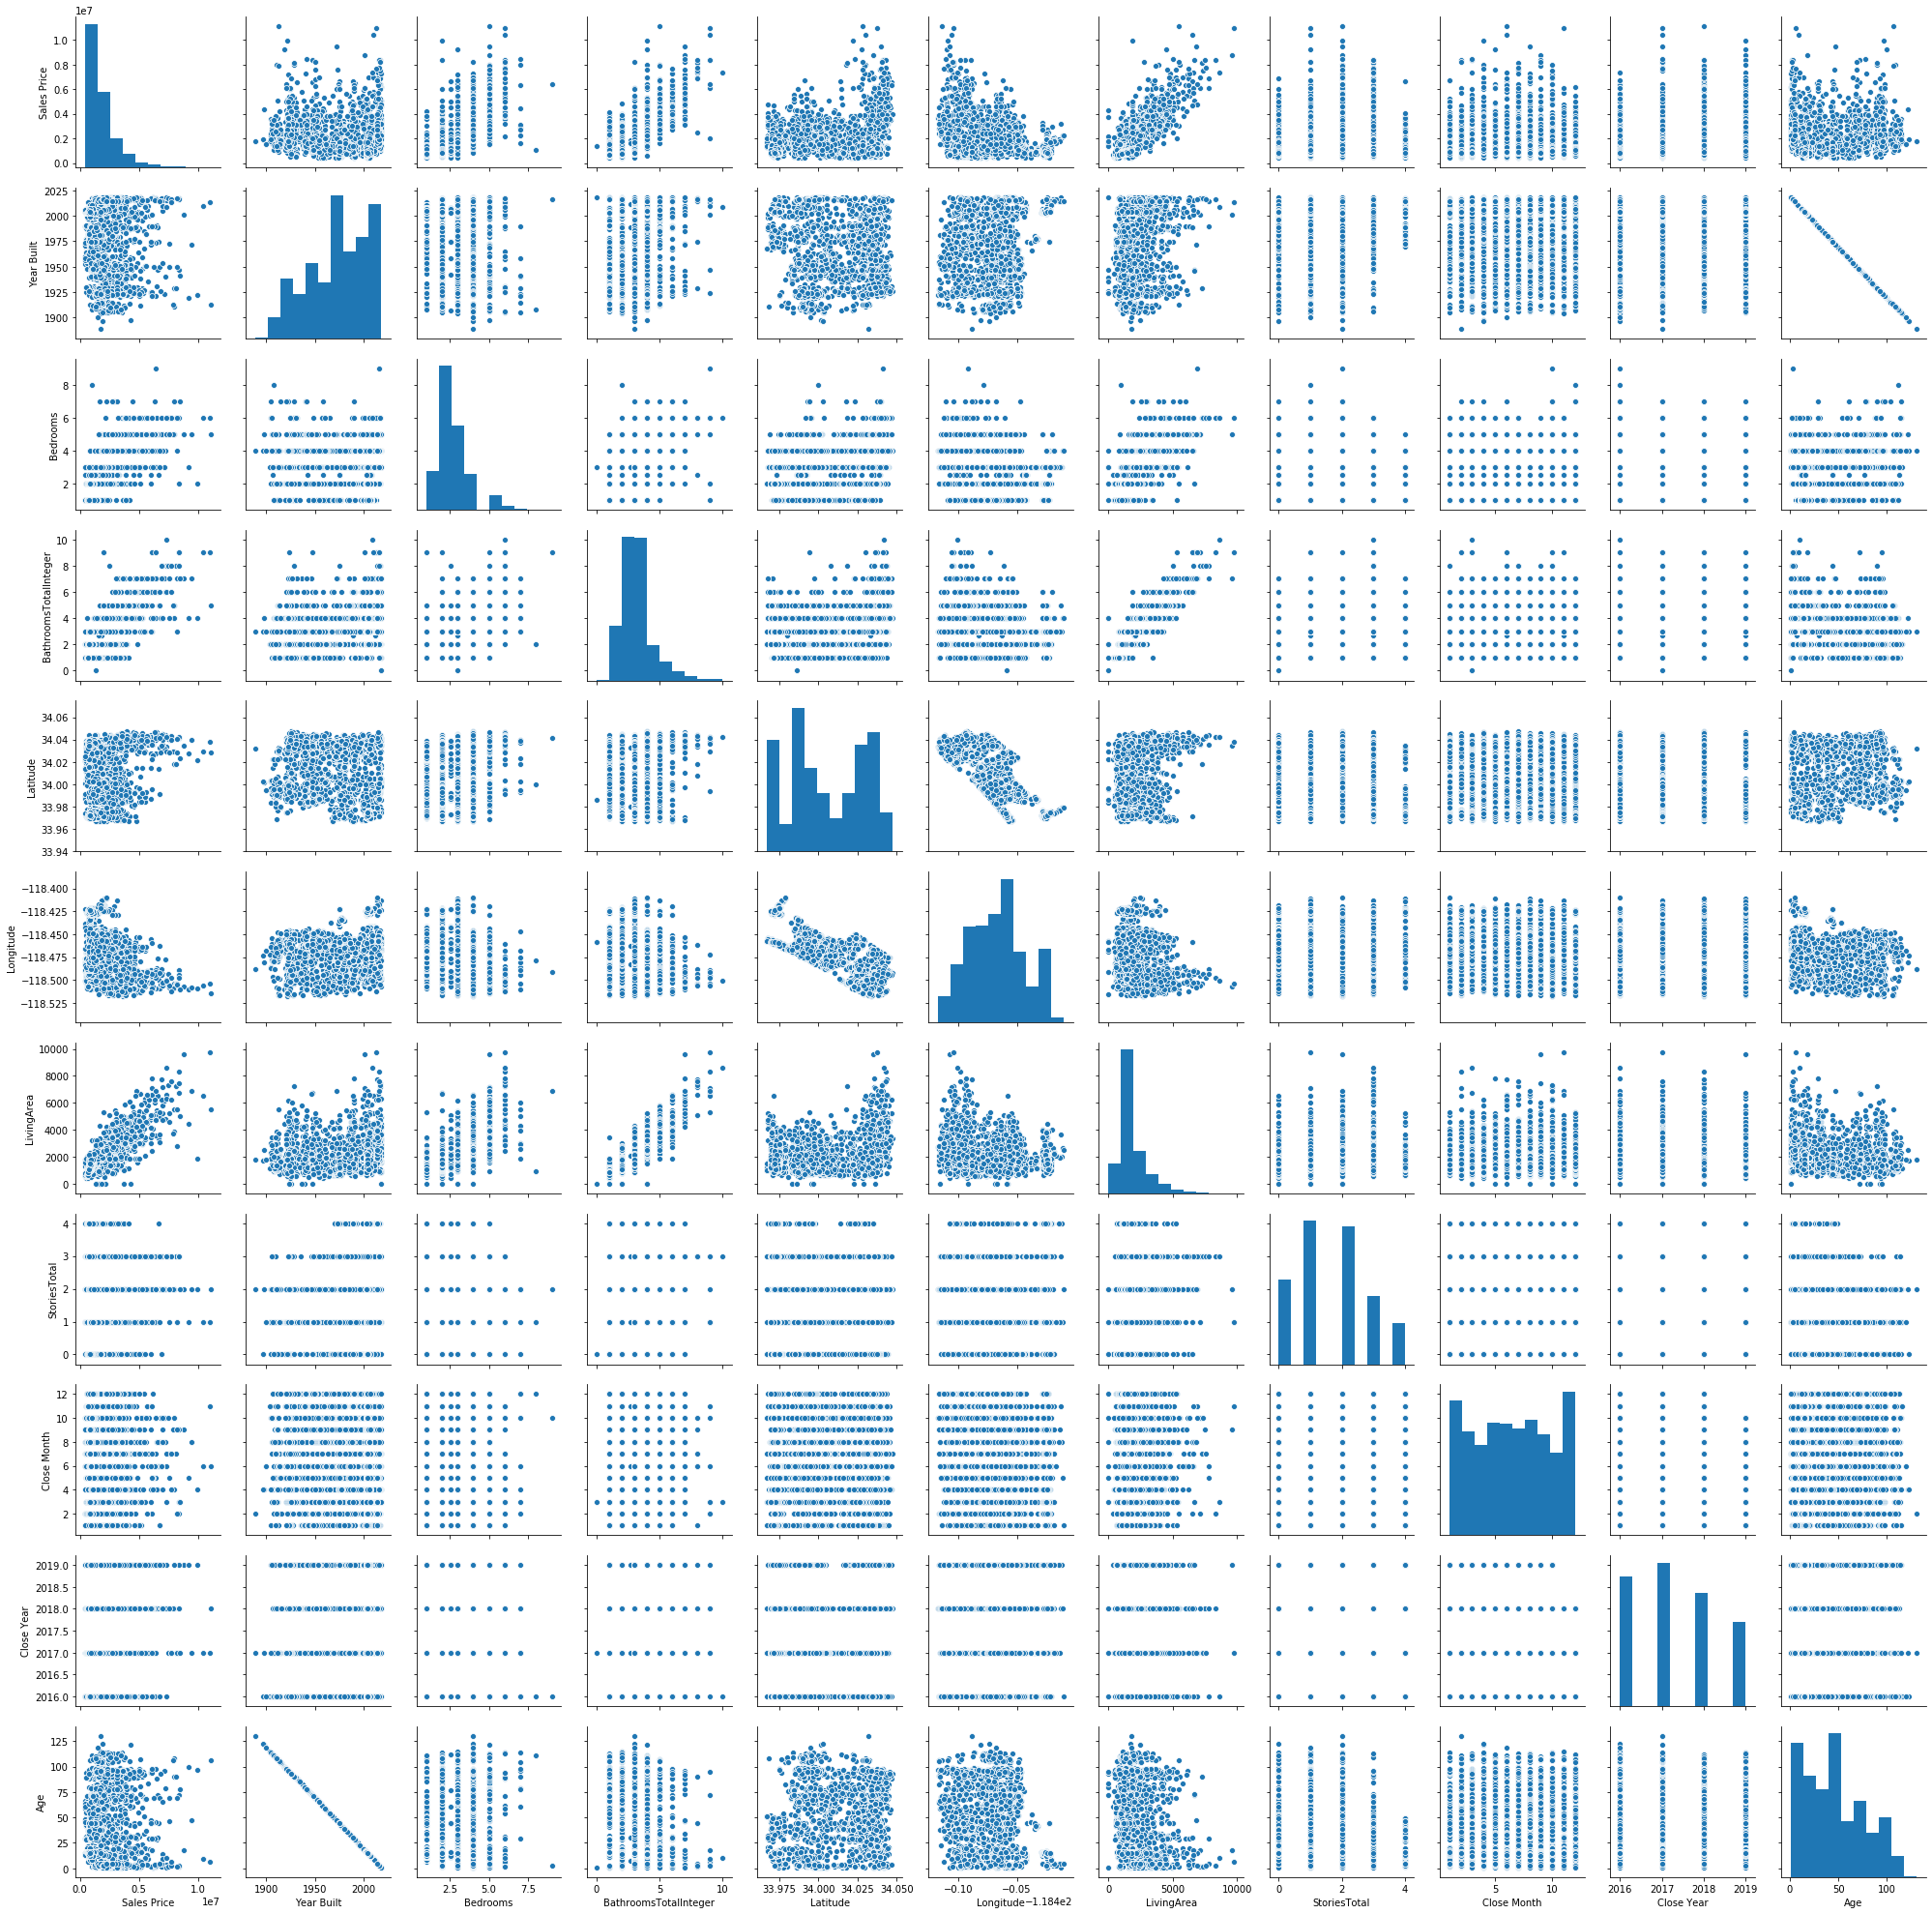

In [779]:
# sns.pairplot(master)

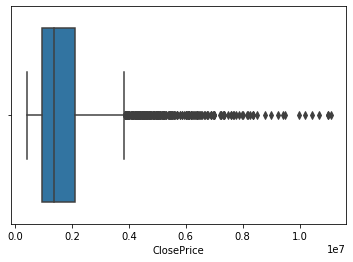

In [1407]:
sns.boxplot(master['ClosePrice'])

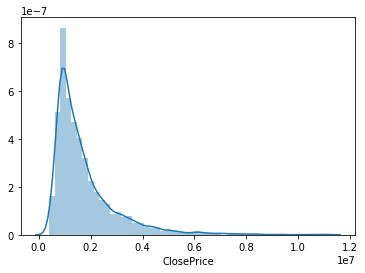

In [1408]:
sns.distplot((master['ClosePrice']))

## Compute the pairwise correlation

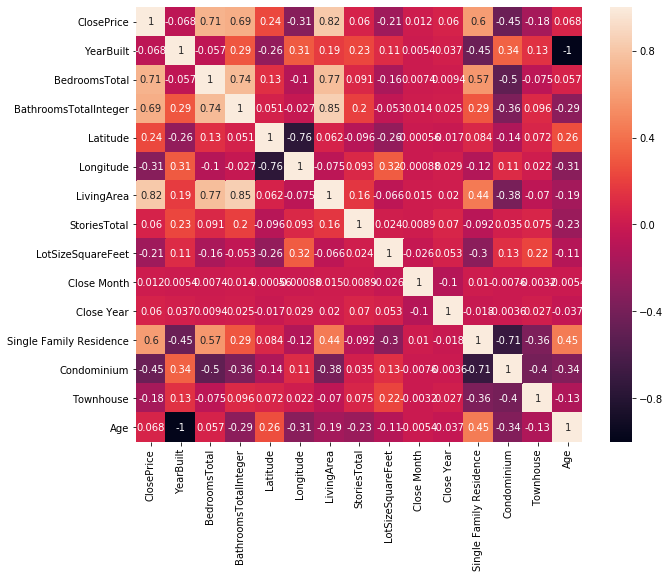

In [1409]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(master.corr(),annot=True)

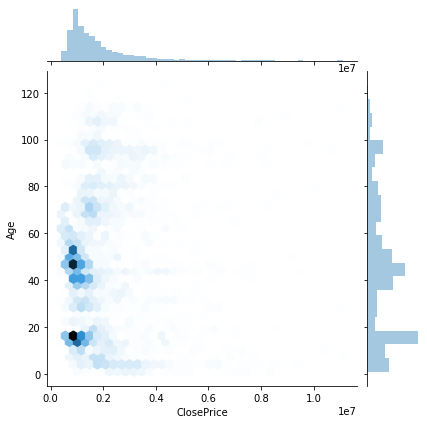

In [1410]:
sns.jointplot(data=master, x='ClosePrice' , y = 'Age', kind='hex')

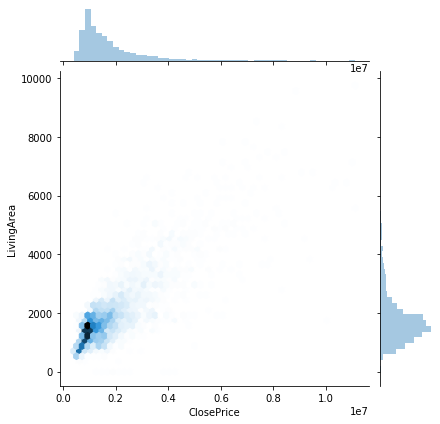

In [1411]:
sns.jointplot(data=master, x='ClosePrice' , y = 'LivingArea', kind='hex')

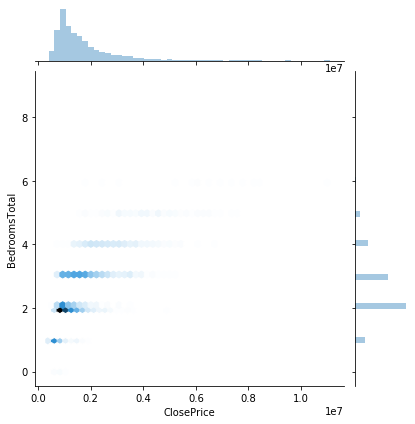

In [1412]:
sns.jointplot(data=master, x='ClosePrice' , y = 'BedroomsTotal', kind='hex')

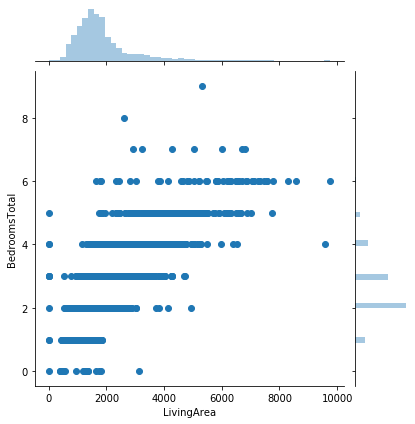

In [1413]:
sns.jointplot(data=master, x='LivingArea' , y = 'BedroomsTotal')

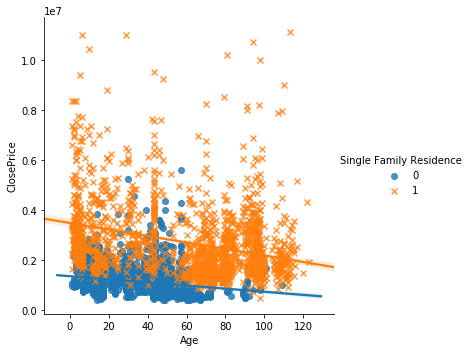

In [1414]:
sns.lmplot(data=master, x='Age', y = 'ClosePrice', 
           hue = 'Single Family Residence', markers=["o", "x"]);

In [1415]:
master['ClosePrice'].describe()

count    4.204000e+03
mean     1.757932e+06
std      1.266108e+06
min      4.020000e+05
25%      9.407500e+05
50%      1.359500e+06
75%      2.100000e+06
max      1.110000e+07
Name: ClosePrice, dtype: float64

In [1416]:
master.columns

Index(['ClosePrice', 'YearBuilt', 'BedroomsTotal', 'BathroomsTotalInteger',
       'Latitude', 'Longitude', 'LivingArea', 'StoriesTotal',
       'LotSizeSquareFeet', 'Close Month', 'Close Year',
       'Single Family Residence', 'Condominium', 'Townhouse', 'Age'],
      dtype='object')

# Modeling

In [981]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [996]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [1005]:
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import textwrap # for wrapping answer descriptions
# from individual_soln import * # use functions from individual_soln.py

## Train Test Split

In [1417]:
models = master
y = models['ClosePrice']
X = models[['Age','LotSizeSquareFeet',
            'Single Family Residence', 'Condominium', 'Townhouse',
            'BedroomsTotal','BathroomsTotalInteger'
            ,'Latitude','Longitude'
            ,'LivingArea','StoriesTotal'
            ,'Close Month','Close Year']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

# Linear Regression

In [1418]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print(lm.intercept_)
print(metrics.explained_variance_score(y_test,predictions)) #R2 score
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff']) #Coefficients DF

-1378095834.2120047
0.8133595593508585


,Coeff
Age,1.166469e+03
LotSizeSquareFeet,-4.421744e-02
Single Family Residence,1.304095e+06
Condominium,6.552652e+05
Townhouse,4.658761e+05
BedroomsTotal,-1.118876e+04
BathroomsTotalInteger,1.512936e+05
Latitude,7.582055e+05
Longitude,-1.029946e+07
LivingArea,6.723940e+02


### Loss Functions

In [1419]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

367187.6057436328
336539717828.12994
580120.4338998325


### Predictions

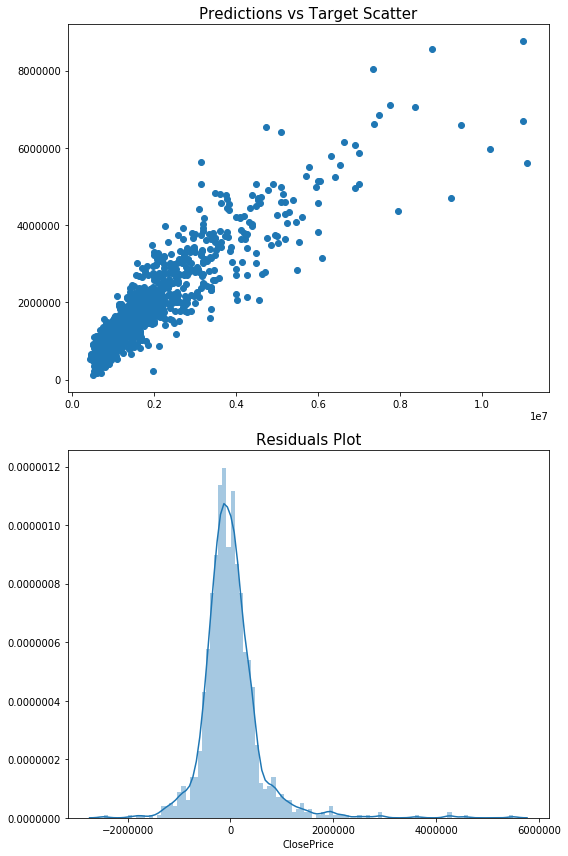

In [1420]:
fig, axs = plt.subplots(2,1,figsize=(8,12))
axs[0].scatter(y_test,predictions)
axs[0].set_title('Predictions vs Target Scatter', size=15)
axs[1]=sns.distplot(y_test-predictions, bins = 100)
axs[1].set_title('Residuals Plot', size=15)
plt.tight_layout()

# Random Forest Regressor Model

In [1421]:
rfr = RandomForestRegressor(n_estimators=500, max_features=3)
rfr.fit(X_train,y_train)
rfr_predictions = rfr.predict(X_test)

print(rfr.score(X_test,y_test)) #R2 score
print(rfr.feature_importances_) #Feature Importances

0.8876914065841964
[0.04768064 0.06336671 0.09388082 0.03783027 0.00934896 0.11046857
 0.14285057 0.07640383 0.1023357  0.27575462 0.01342271 0.01554276
 0.01111383]


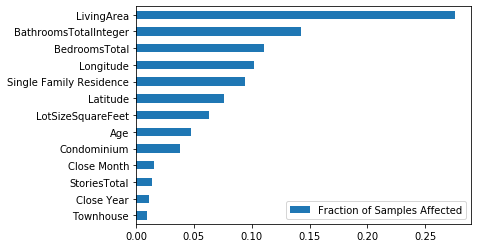

In [1422]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rfr.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

# Gradient Boosting

In [1423]:
model = GradientBoostingRegressor(learning_rate=0.01, 
                                  n_estimators=500, 
                                  max_depth=3)

model.fit(X_train, y_train)
gbr_predict = model.predict(X_test)

print(r2_score(y_test, gbr_predict))
print(model.score(X_test,y_test))

0.8762327200327529
0.8762327200327529


# XGBOOST

In [1424]:
import xgboost as xgb
from sklearn import ensemble
from xgboost import XGBClassifier

In [1425]:
model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [1426]:
model.fit(X_train,y_train)
predict=model.predict(X_test)

model.score(X_test,y_test)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:17:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8907159583409604